In [ ]:
%cd ../../src

In [1]:
from dataload import load
from utils import get_relevant_relations, get_p_types, get_relevant_relations, RDF_NUMBER_TYPES

from typing import Tuple
import matplotlib.pyplot as plt

c:\Users\Noctris\.virtualenvs\rdf-literal-preprocessing-20b3_M0v\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = load(dataset_name='mdgenre',prune_dist=None)

loaded data mdgenre (76.84s).


In [5]:
data.datatypes()

['iri',
 'http://kgbench.info/dt#base64Image',
 'http://www.w3.org/1999/02/22-rdf-syntax-ns#langString',
 'http://www.w3.org/2001/XMLSchema#dateTime',
 'http://www.w3.org/2001/XMLSchema#decimal',
 'http://www.w3.org/2001/XMLSchema#string']

In [3]:
data.i2e

[('"Crocodile" Dundee',
  'http://www.w3.org/1999/02/22-rdf-syntax-ns#langString'),
 ('#Selfie', 'http://www.w3.org/1999/02/22-rdf-syntax-ns#langString'),
 ('&ME', 'http://www.w3.org/1999/02/22-rdf-syntax-ns#langString'),
 ("''C.B.''", 'http://www.w3.org/2001/XMLSchema#string'),
 ("'71", 'http://www.w3.org/1999/02/22-rdf-syntax-ns#langString'),
 ("'A' gai wak", 'http://www.w3.org/1999/02/22-rdf-syntax-ns#langString'),
 ("'Tex' O'Brien", 'http://www.w3.org/2001/XMLSchema#string'),
 ("'Twas the Night", 'http://www.w3.org/1999/02/22-rdf-syntax-ns#langString'),
 ('(500) Days of Summer',
  'http://www.w3.org/1999/02/22-rdf-syntax-ns#langString'),
 ('(Space Invader)', 'http://www.w3.org/2001/XMLSchema#string'),
 ('***', 'http://www.w3.org/2001/XMLSchema#string'),
 ('-0070-04-01T00:00:00Z', 'http://www.w3.org/2001/XMLSchema#dateTime'),
 ('-0100-01-01T00:00:00Z', 'http://www.w3.org/2001/XMLSchema#dateTime'),
 ('-0108-01-01T00:00:00Z', 'http://www.w3.org/2001/XMLSchema#dateTime'),
 ('-0183-01-0

In [160]:
data.i2e[data.triples[9999,0]]

('http://bag.basisregistraties.overheid.nl/bag/id/geometry/880DCB4AC72AAEA1F9124C6FC9A18B36',
 'iri')

In [161]:
data.i2e

[('', 'none'),
 ('"\'t Munnikenhof". OVERBLIJFSEL van een XVII A tot buitenplaats verbouwde laatmiddeleeuwse UITHOF van de Middelburgse abdij. Het na de sloping van de hoofdvleugel ong 1860 overgebleven gedeelte dat gespaard bleef als jachthuis omvat de in XVII aangebouwde vleugel voorzien van een gevel van breuksteen, aan de rechterzijde geflankeerd door de (verminkte) trap-uitzicht-toren. XVII fragmenten, o.a. gebeeldhouwde balkkoppen. De XIX B gevel en de toren bepleisterd.',
  '@nl-nl'),
 ('"Aazicht". Zeer fraai witgepleisterde boerenwoning, dwarstype met hoge opkamer, rieten dak, 17e eeuw. Bedrijfsgedeelte van later tijd.',
  '@nl-nl'),
 ('"Alexanderhof". Boerderij uit de 18e eeuw onder rieten wolfdak. Vensters met negen- en zesruitsschuiframen. Links een uitgebouwde opkamer, aansluitend tegen een puntgevel.',
  '@nl-nl'),
 ('"Alle morgen nieuwe zorgen". Boerderij (XVII), waarvan het woongedeelte een puntgevel met geblokte ontlastingsbogen heeft. Rechts een opkamer boven kelder me

In [88]:
import pandas as pd
import numpy as np
from kgbench.load import Data

In [89]:
import torch
def add_triple(data:Data,s:Tuple[str,str],p:str,o:Tuple[str,str])-> Data:
    if s not in data.e2i:
        new_id = len(data.i2e)
        data.e2i[s] = new_id
        data.i2e[new_id] = s
        data.num_entities += 1
        print(f'created new entity:')
        print(f'{data.e2i[s]} - {s}')
    if o not in data.e2i:
        new_id = len(data.i2e)
        data.e2i[o] = new_id
        data.i2e.append(o)
        data.num_entities += 1
        print(f'created new entity:')
        print(f'{data.e2i[o]} - {o}')
    if p not in data.r2i:
        new_id = len(data.i2r)
        data.r2i[p] = new_id
        data.i2r.append(p)
        data.num_relations += 1
        print(f'created new relation:')
        print(f'{data.r2i[p]} - {p}')
    si = data.e2i[s]
    pi = data.r2i[p]
    oi = data.e2i[o]
    print(f'added triple:')
    print(f'{si} - {pi} - {oi}')
    new_triple = torch.tensor([[si,pi,oi]], dtype=torch.int32)
    data.triples = torch.cat((data.triples, new_triple), 0)
    return data

In [90]:
type(data.triples)

torch.Tensor

In [91]:
print(len(data.triples))
print(data.num_classes)
print(data.num_entities)
data = add_triple(data, data.i2e[0],data.i2r[41],("teeest","test"))
print(len(data.triples))
print(data.num_classes)
print(data.num_entities)

628976
5
247834
created new entity:
247834 - ('teeest', 'test')
added triple:
0 - 41 - 247834
628977
5
247835


In [93]:
data.datatypes()

['iri',
 'none',
 '@es',
 '@fy',
 '@nl',
 '@nl-nl',
 '@pt',
 '@ru',
 'http://kgbench.info/dt#base64Image',
 'http://www.opengis.net/ont/geosparql#wktLiteral',
 'http://www.w3.org/2001/XMLSchema#anyURI',
 'http://www.w3.org/2001/XMLSchema#boolean',
 'http://www.w3.org/2001/XMLSchema#gYear',
 'http://www.w3.org/2001/XMLSchema#nonNegativeInteger',
 'http://www.w3.org/2001/XMLSchema#positiveInteger',
 'test']

In [83]:
data.e2i[("test","test")]

247834

In [84]:
data.triples

tensor([[113032,     28,  46658],
        [113032,     31, 136266],
        [113033,     28,  53684],
        ...,
        [     3,     41, 247834],
        [     0,     41, 247834],
        [     0,     41, 247835]], dtype=torch.int32)

In [85]:
data.triples[-4:]

tensor([[     3,     41, 247834],
        [     3,     41, 247834],
        [     0,     41, 247834],
        [     0,     41, 247835]], dtype=torch.int32)

In [19]:
p_types = get_p_types(data)
relevant_relations = get_relevant_relations(p_types, RDF_NUMBER_TYPES, data.r2i)

In [46]:
data.get_strings("http://www.w3.org/2001/XMLSchema#gYear")

['1100',
 '1215',
 '1237',
 '1250',
 '1275',
 '1300',
 '1325',
 '1400',
 '1433',
 '1448',
 '1468',
 '1472',
 '1490',
 '1495',
 '1499',
 '1500',
 '1505',
 '1532',
 '1543',
 '1550',
 '1557',
 '1570',
 '1583',
 '1585',
 '1596',
 '1600',
 '1608',
 '1614',
 '1615',
 '1623',
 '1630',
 '1631',
 '1633',
 '1634',
 '1635',
 '1638',
 '1640',
 '1644',
 '1648',
 '1650',
 '1651',
 '1654',
 '1656',
 '1659',
 '1661',
 '1662',
 '1663',
 '1665',
 '1672',
 '1675',
 '1676',
 '1677',
 '1681',
 '1683',
 '1684',
 '1685',
 '1691',
 '1693',
 '1694',
 '1696',
 '1698',
 '1699',
 '1700',
 '1702',
 '1705',
 '1710',
 '1711',
 '1712',
 '1714',
 '1715',
 '1717',
 '1718',
 '1720',
 '1721',
 '1722',
 '1725',
 '1727',
 '1729',
 '1730',
 '1732',
 '1733',
 '1735',
 '1738',
 '1739',
 '1740',
 '1741',
 '1742',
 '1743',
 '1744',
 '1748',
 '1749',
 '1750',
 '1751',
 '1753',
 '1754',
 '1760',
 '1762',
 '1763',
 '1765',
 '1770',
 '1772',
 '1773',
 '1774',
 '1775',
 '1776',
 '1777',
 '1778',
 '1779',
 '1780',
 '1781',
 '1783',
 

In [20]:
relevant_relations

[26, 2, 43]

In [96]:
encoded_df

tensor([[186334,   1884,   3106],
        [186626,   1696,   2450],
        [186748,   1739,   2607],
        ...,
        [202076,   1714,   2515],
        [202093,   1850,   2954],
        [202097,   1792,   2726]], dtype=torch.int32)

In [140]:
import torch
encoded_df = data.triples.clone()
encoded_df = encoded_df[encoded_df[:,1]==2]

#encoded_df = encoded_df[:,[0,2]]
for i in range(len(encoded_df)):
    encoded_df[i,1] = torch.tensor(float(data.i2e[encoded_df[i,2]][0]), dtype=torch.float32)

In [101]:
encoded_df.long()

tensor([[186334,   1884,   3106],
        [186626,   1696,   2450],
        [186748,   1739,   2607],
        ...,
        [202076,   1714,   2515],
        [202093,   1850,   2954],
        [202097,   1792,   2726]])

In [119]:
torch.tensor(torch.from_numpy(np.digitize(
            encoded_df[:,1], np.histogram(encoded_df[:,1], 5)[1])))

C:\Users\Noctris\AppData\Local\Temp\ipykernel_1300\2520567414.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(torch.from_numpy(np.digitize(


tensor([1, 1, 1,  ..., 1, 1, 1])

In [141]:
np.histogram(encoded_df[:,1], 5)
t = torch.from_numpy(np.digitize(
            encoded_df[:,1], np.histogram(encoded_df[:,1], 5)[1]))
encoded_df = torch.cat((encoded_df,torch.from_numpy(np.digitize(
            encoded_df[:,1], np.histogram(encoded_df[:,1], 5)[1])).reshape(-1,1)),1)

In [150]:
encoded_df[:,2]

tensor([  357,   445,   465,  ..., 14968, 14972, 14975])

In [146]:
t

tensor([1, 1, 1,  ..., 1, 1, 1])

In [143]:
t.reshape(-1,1).shape

torch.Size([7395, 1])

In [144]:
t.shape

torch.Size([7395])

In [145]:
data.triples.shape

torch.Size([628977, 3])

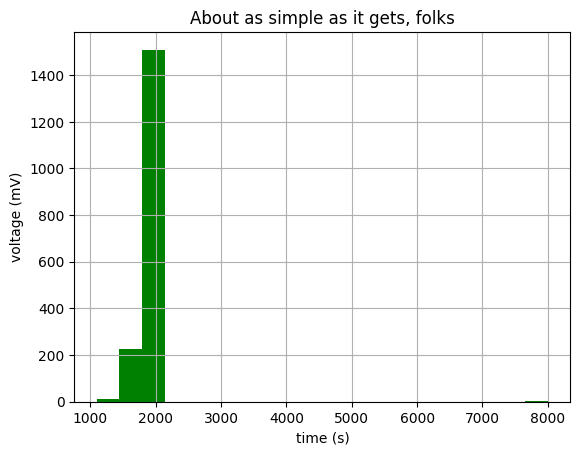

In [105]:

fig, ax = plt.subplots()
#ax.hist(df[:,2], color = "skyblue", lw=0)
colors = {60:"skyblue", 65:"blue", 43:"green"}

ax.hist(encoded_df[:,1], bins=20 , color = "green", lw=0)
#ax.hist(df[:,2])#
#ax.plot(df[:,1], df[:,2])

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
     title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()

In [151]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=10)
lof.fit(encoded_df[:,1].reshape(-1, 1))


LocalOutlierFactor(n_neighbors=10)

In [152]:
import torch
outlier_scores = lof.negative_outlier_factor_

# Create a new column in the numpy array to store the outlier scores
#tensor_np = torch.hstack((encoded_df, outlier_scores.reshape(-1,1)))
threshold = np.percentile(outlier_scores, 10)


# use the outlier scores to filter out the outliers from the numpy array
encoded_df = encoded_df[outlier_scores > threshold]

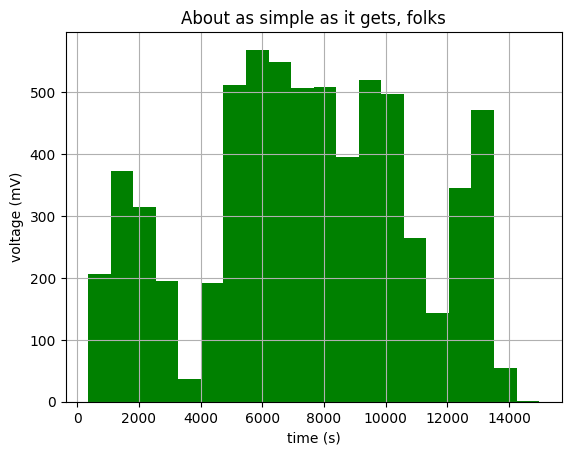

In [153]:
fig, ax = plt.subplots()
#ax.hist(df[:,2], color = "skyblue", lw=0)
colors = {60:"skyblue", 65:"blue", 43:"green"}

ax.hist(encoded_df[:,2], bins=20 , color = "green", lw=0)
#ax.hist(df[:,2])#
#ax.plot(df[:,1], df[:,2])

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
     title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()

In [ ]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
# convert tensor to numpy array
tensor_np = a.numpy()

# create an instance of the LOF algorithm
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# fit the LOF model to the feature you want to use to identify outliers
lof.fit(tensor_np[:, [2]])

# use the negative_outlier_factor_ attribute to get the outlier scores for each sample
outlier_scores = lof.negative_outlier_factor_

# Create a new column in the numpy array to store the outlier scores
tensor_np = np.hstack((tensor_np, outlier_scores.reshape(-1,1)))
threshold = np.percentile(outlier_scores, 1)


# use the outlier scores to filter out the outliers from the numpy array
tensor_np = tensor_np[outlier_scores > threshold]

In [13]:
torch.isin(df[:,1],torch.tensor([60, 65, 72, 71, 68, 66]))

tensor([False, False, False,  ..., False, False, False])

In [30]:
import torch
df = data.triples
#torch.any()
#torch.equal(df[:,1],[60, 65, 72, 71, 68, 66])
df_filtered = df[torch.isin(df[:,1],torch.tensor(relevant_relations))]

df_filtered[:,0]
len(torch.unique(df[df[:,1]==71][:,0]))

680

In [32]:
df_ = df[torch.isin(df[:,0],torch.unique(df[df[:,1]==71][:,0]))]

In [62]:
unique_values, counts = torch.unique(df_[:,1],return_counts=True)
torch.argmax(counts)

tensor(13)

In [63]:
unique_values[torch.argmax(counts)]

tensor(38, dtype=torch.int32)

In [107]:
df_out = df[df[:,1] == 87]
print(len(df_out[:,0]))
df_out

6604


tensor([[123989,     87, 109122],
        [157230,     87, 175999],
        [100850,     87, 182597],
        ...,
        [152675,     87, 151077],
        [255371,     87, 176516],
        [179962,     87, 199817]], dtype=torch.int32)

In [87]:
stack[:,1].sort(descending=True)

TypeError: tuple indices must be integers or slices, not tuple

In [88]:
stack = torch.stack((unique_values, counts), dim=1)
#torch.sort()
#stack = stack[:,1].sort(descending=True)
stack[stack[:,1].sort(descending=True)[1]]

tensor([[   38, 12639],
        [   24,  2735],
        [  120,  1781],
        [   40,  1528],
        [  121,  1436],
        [  144,  1353],
        [   39,  1339],
        [   81,  1149],
        [  129,  1120],
        [  127,  1088],
        [  139,  1025],
        [  108,   974],
        [  134,   861],
        [   82,   831],
        [   91,   830],
        [  118,   799],
        [  141,   723],
        [   65,   691],
        [   71,   682],
        [  103,   672],
        [    4,   668],
        [  145,   660],
        [   32,   650],
        [   86,   647],
        [   87,   642],
        [   72,   520],
        [  140,   400],
        [   27,   360],
        [   92,   317],
        [   67,   294],
        [   28,   289],
        [   76,   225],
        [   53,   221],
        [   84,   219],
        [   44,   219],
        [   45,   212],
        [  109,   158],
        [   35,   151],
        [   96,   115],
        [   43,   114],
        [  106,   106],
        [  136, 

In [73]:
torch.sort(torch.stack((unique_values, counts), dim=1),dim=1)

torch.return_types.sort(
values=tensor([[    0,    27],
        [    4,   668],
        [   12,    16],
        [    7,    19],
        [   20,    56],
        [   21,    37],
        [   19,    22],
        [   24,  2735],
        [    2,    26],
        [   27,   360],
        [   28,   289],
        [   32,   650],
        [   35,   151],
        [   38, 12639],
        [   39,  1339],
        [   40,  1528],
        [   12,    41],
        [   43,   114],
        [   44,   219],
        [   45,   212],
        [   46,    57],
        [    1,    48],
        [   53,   221],
        [   55,    67],
        [   47,    58],
        [   65,   691],
        [   67,   294],
        [    2,    69],
        [   71,   682],
        [   72,   520],
        [   76,   225],
        [   81,  1149],
        [   82,   831],
        [   71,    83],
        [   84,   219],
        [   86,   647],
        [   87,   642],
        [   17,    90],
        [   91,   830],
        [   92,   317],
        

In [33]:
len(df_[:,0])

42249

In [ ]:
def secondary_relations(data,relevant_relations):
    data.triples

In [57]:
relevant_relations

encoded_df = data.triples.clone()
encoded_df = encoded_df[encoded_df[:,1]==71]

#encoded_df = encoded_df[:,[0,2]]
for i in range(len(encoded_df)):
    encoded_df[i,1] = torch.tensor(float(data.i2e[encoded_df[i,2]][0]), dtype=torch.float32)


In [110]:
encoded_df
df_out
print(len(encoded_df))

edf = encoded_df[~torch.isin(encoded_df[:,0],torch.tensor(df_out[:,0]))]
print(len(edf))

682
82


C:\Users\Noctris\AppData\Local\Temp\ipykernel_35396\971667282.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  edf = encoded_df[~torch.isin(encoded_df[:,0],torch.tensor(df_out[:,0]))]


In [91]:
len(encoded_df[:,0])

682

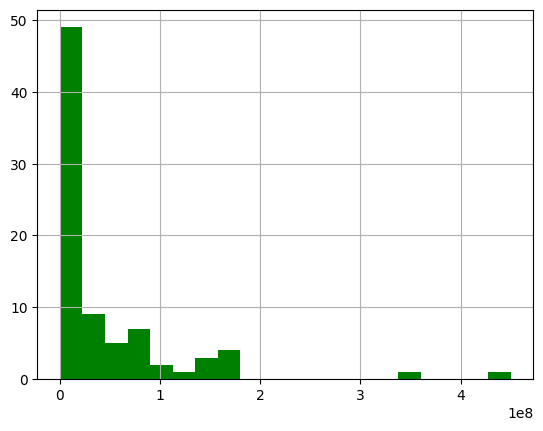

In [111]:

fig, ax = plt.subplots()
#ax.hist(df[:,2], color = "skyblue", lw=0)
colors = {60:"skyblue", 65:"blue", 43:"green"}

a = df[df[:,1]== 71 ]
ax.hist(edf[:,1], bins=20 , color = "green", lw=0)
#ax.hist(df[:,2])#
#ax.plot(df[:,1], df[:,2])

#ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#      title='About as simple as it gets, folks')
ax.grid()

#fig.savefig("test.png")
plt.show()

In [ ]:
fig, ax = plt.subplots()
#ax.hist(df[:,2], color = "skyblue", lw=0)
colors = {60:"skyblue", 65:"blue", 43:"green"}

a = df[df[:,1]== 71 ]
ax.hist(a[:,2], bins=20 , color = "green", lw=0)
#ax.hist(df[:,2])#
#ax.plot(df[:,1], df[:,2])

#ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#      title='About as simple as it gets, folks')
ax.grid()

#fig.savefig("test.png")
plt.show()

In [52]:
torch.histogram(a[:,2], bins=10)

RuntimeError: "histogramdd" not implemented for 'Int'

In [46]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
# convert tensor to numpy array
tensor_np = a.numpy()

# create an instance of the LOF algorithm
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# fit the LOF model to the feature you want to use to identify outliers
lof.fit(tensor_np[:, [2]])

# use the negative_outlier_factor_ attribute to get the outlier scores for each sample
outlier_scores = lof.negative_outlier_factor_

# Create a new column in the numpy array to store the outlier scores
tensor_np = np.hstack((tensor_np, outlier_scores.reshape(-1,1)))
threshold = np.percentile(outlier_scores, 1)


# use the outlier scores to filter out the outliers from the numpy array
tensor_np = tensor_np[outlier_scores > threshold]

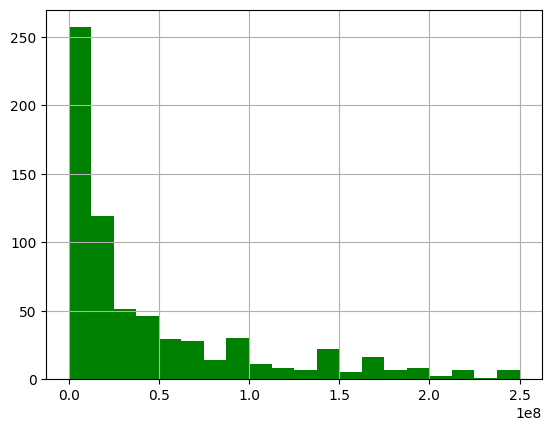

In [47]:
fig, ax = plt.subplots()
#ax.hist(df[:,2], color = "skyblue", lw=0)
colors = {60:"skyblue", 65:"blue", 43:"green"}

#a = df[df[:,1]== 68 ]
ax.hist(tensor_np[:,2], bins=20 , color = "green", lw=0)
#ax.hist(df[:,2])#
#ax.plot(df[:,1], df[:,2])

#ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#      title='About as simple as it gets, folks')
ax.grid()

#fig.savefig("test.png")
plt.show()

In [134]:
#Kullback-Leibler (KL) divergence
import math
a = df[df[:,1]== 15 ]
b = df[df[:,1]== 15 ]
a_bin = np.histogram(a[:,2],10)[0]
b_bin = np.histogram(b[:,2],10)[0]
a_len = len(a[:,2])
b_len = len(b[:,2])
sum_l =0
e = 0.00000000001
for i in range(len(a_bin)):
    #print(f'{a_bin[i]} vs {b_bin[i]}')
    if b_bin[i] != 0:
        sum_l += np.log((a_bin[i]/b_bin[i])+e)*a_bin[i]
b_len/a_len *sum_l 

5.1960004298929876e-08

In [135]:
data.i2e[b[2,0]][0]

'_:N00185dbc67a74bb98c987223159899e8'

In [136]:
import re
re.split(r'/\w*/?$',data.i2e[b[2,0]][0])[0]

'_:N00185dbc67a74bb98c987223159899e8'

In [137]:
import re

In [138]:
s = []
for _ in a[:,0]:

    s.append( re.split(r'/\w*/?$',data.i2e[_][0])[0])

In [141]:
len(np.unique(s))

5196

In [142]:
len(s)

5196

In [78]:
np.log(0.1)

-2.3025850929940455

In [62]:
import math
math.log(2)

0.6931471805599453

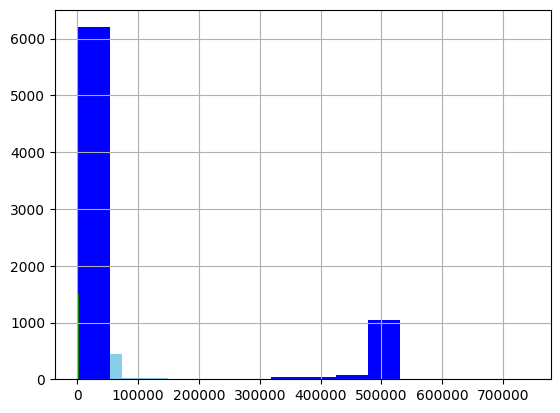

In [48]:



fig, ax = plt.subplots()
#ax.hist(df[:,2], color = "skyblue", lw=0)
colors = {26:"skyblue", 2:"blue", 43:"green"}
for _ in relevent_relations:
    a = df[df[:,1]== _ ]
    ax.hist(a[:,2], color = colors[_], lw=0)
#ax.hist(df[:,2])#
#ax.plot(df[:,1], df[:,2])

#ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#      title='About as simple as it gets, folks')
ax.grid()

#fig.savefig("test.png")
plt.show()

In [8]:
object_types

{'http://www.opengis.net/ont/geosparql#asWKT': (['iri'],
  ['http://www.opengis.net/ont/geosparql#wktLiteral']),
 'http://www.w3.org/1999/02/22-rdf-syntax-ns#type': (['iri'], ['iri']),
 'http://www.geonames.org/ontology#alternateName': (['iri'], ['none']),
 'http://www.geonames.org/ontology#countryCode': (['iri'], ['none']),
 'http://www.geonames.org/ontology#featureClass': (['iri'], ['iri']),
 'http://www.geonames.org/ontology#featureCode': (['iri'], ['iri']),
 'http://www.geonames.org/ontology#locationMap': (['iri'], ['iri']),
 'http://www.geonames.org/ontology#name': (['iri'], ['none']),
 'http://www.geonames.org/ontology#nearbyFeatures': (['iri'], ['iri']),
 'http://www.geonames.org/ontology#parentADM1': (['iri'], ['iri']),
 'http://www.geonames.org/ontology#parentADM2': (['iri'], ['iri']),
 'http://www.geonames.org/ontology#parentCountry': (['iri'], ['iri']),
 'http://www.geonames.org/ontology#parentFeature': (['iri'], ['iri']),
 'http://www.geonames.org/ontology#population': (['i